In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils.np_utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datagen_train = ImageDataGenerator(
    samplewise_center=True,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen_valid = ImageDataGenerator(samplewise_center=True)
datagen_test = ImageDataGenerator(samplewise_center=True)

In [ ]:
# load and iterate training dataset
train_ds = datagen_train.flow_from_directory(
    '/content/drive/MyDrive/Datasets/rotten_vs_fresh/train/',
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary"
)

# load and iterate validation dataset
valid_ds = datagen_valid.flow_from_directory(
    '/content/drive/MyDrive/Datasets/rotten_vs_fresh/valid/',
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary"
)

# load and iterate test dataset
test_ds = datagen_test.flow_from_directory(
    '/content/drive/MyDrive/Datasets/rotten_vs_fresh/test/',
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    shuffle=False
)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


# Model 01

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 64, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
# model.add(Dense(1,activation="softmax"))

#Output layer
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "sigmoid"))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x = train_ds, validation_data = valid_ds, epochs=10)

Epoch 1/10
150/150 [==============================] - 757s 5s/step - loss: 4.0618 - accuracy: 0.6746 - val_loss: 0.3817 - val_accuracy: 0.8150
Epoch 2/10
150/150 [==============================] - 111s 737ms/step - loss: 0.3537 - accuracy: 0.8515 - val_loss: 0.2608 - val_accuracy: 0.9000
Epoch 3/10
150/150 [==============================] - 111s 740ms/step - loss: 0.2854 - accuracy: 0.8838 - val_loss: 0.3246 - val_accuracy: 0.8833
Epoch 4/10
150/150 [==============================] - 115s 767ms/step - loss: 0.2451 - accuracy: 0.9029 - val_loss: 0.2422 - val_accuracy: 0.9050
Epoch 5/10
150/150 [==============================] - 111s 736ms/step - loss: 0.2333 - accuracy: 0.9050 - val_loss: 0.1606 - val_accuracy: 0.9500
Epoch 6/10
150/150 [==============================] - 111s 736ms/step - loss: 0.2131 - accuracy: 0.9167 - val_loss: 0.2601 - val_accuracy: 0.9033
Epoch 7/10
150/150 [==============================] - 111s 739ms/step - loss: 0.2129 - accuracy: 0.9187 - val_loss: 0.1703 - va

In [ ]:
model.evaluate(valid_ds)

19/19 [==============================] - 5s 264ms/step - loss: 0.1627 - accuracy: 0.9667


[0.1626722812652588, 0.9666666388511658]

In [ ]:
model.evaluate(test_ds)

38/38 [==============================] - 269s 7s/step - loss: 0.1945 - accuracy: 0.9334


[0.19447921216487885, 0.9333888292312622]

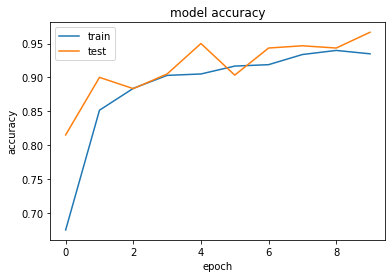

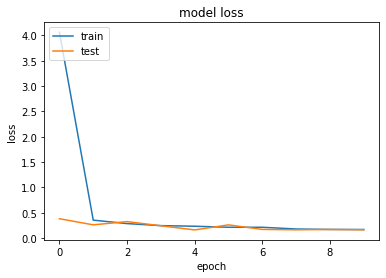

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction Model1

In [ ]:
def make_predictions(image_path):
    # show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

def fresh_or_rotten(image_path):
    print(image_path)
    preds = make_predictions(image_path)
    print(preds)

    if preds <= 0.5:
        print("Fresh!")
    else:
        print("Rotten!")



/content/drive/MyDrive/Datasets/Fresh/Custom/banana1.jpg
(214, 235, 3)
1/1 [==============================] - 0s 121ms/step
[[0.23584385]]
Fresh!


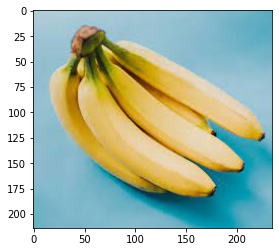

In [ ]:
fresh_or_rotten('/content/drive/MyDrive/Datasets/Fresh/Custom/banana1.jpg')

/content/drive/MyDrive/Datasets/Fresh/Custom/apple2.jpg
(228, 221, 3)
1/1 [==============================] - 0s 19ms/step
[[-13.048897]]
Fresh!


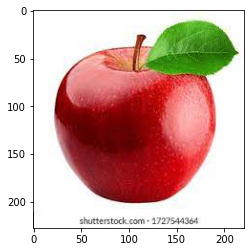

In [ ]:
fresh_or_rotten('/content/drive/MyDrive/Datasets/Fresh/Custom/apple2.jpg')

/content/drive/MyDrive/Datasets/Fresh/Custom/rotapple1.jpg
(194, 259, 3)
1/1 [==============================] - 0s 18ms/step
[[0.31539395]]
Fresh!


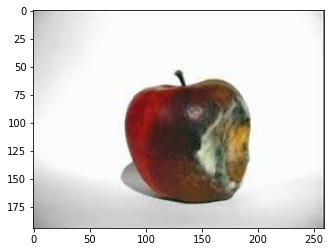

In [ ]:
fresh_or_rotten('/content/drive/MyDrive/Datasets/Fresh/Custom/rotapple1.jpg')

/content/drive/MyDrive/Datasets/Fresh/Custom/rotorange2.jpg
(655, 880, 3)
1/1 [==============================] - 0s 31ms/step
[[4.1248555]]
Rotten!


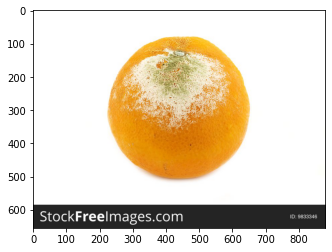

In [ ]:
fresh_or_rotten('/content/drive/MyDrive/Datasets/Fresh/Custom/rotorange2.jpg')

# Model 2

In [ ]:
base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False);

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
inputs =  keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

x = keras.layers.GlobalAveragePooling2D()(x)

outputs = keras.layers.Dense(1,activation = 'sigmoid')(x)

model2 = keras.Model(inputs, outputs)

In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model2.compile(loss=keras.losses.BinaryCrossentropy(from_logits=False), metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
history=model2.fit(train_ds,
          validation_data = valid_ds,
          steps_per_epoch = train_ds.samples/train_ds.batch_size,
          validation_steps = valid_ds.samples/valid_ds.batch_size,
          epochs = 10)

Epoch 1/10
150/150 [==============================] - 3039s 20s/step - loss: 0.5618 - binary_accuracy: 0.7990 - val_loss: 0.2551 - val_binary_accuracy: 0.9183
Epoch 2/10
150/150 [==============================] - 2994s 20s/step - loss: 0.1692 - binary_accuracy: 0.9354 - val_loss: 0.1454 - val_binary_accuracy: 0.9517
Epoch 3/10
150/150 [==============================] - 2990s 20s/step - loss: 0.1275 - binary_accuracy: 0.9515 - val_loss: 0.1059 - val_binary_accuracy: 0.9600
Epoch 4/10
150/150 [==============================] - 2995s 20s/step - loss: 0.1012 - binary_accuracy: 0.9640 - val_loss: 0.0871 - val_binary_accuracy: 0.9700
Epoch 5/10
150/150 [==============================] - 2987s 20s/step - loss: 0.0864 - binary_accuracy: 0.9712 - val_loss: 0.0810 - val_binary_accuracy: 0.9733
Epoch 6/10
150/150 [==============================] - 2996s 20s/step - loss: 0.0749 - binary_accuracy: 0.9748 - val_loss: 0.0702 - val_binary_accuracy: 0.9783
Epoch 7/10
150/150 [==========================

In [ ]:
model2.evaluate(valid_ds)

19/19 [==============================] - 5s 239ms/step - loss: 0.0560 - binary_accuracy: 0.9783


[0.055983543395996094, 0.9783333539962769]

In [ ]:
model2.evaluate(test_ds)

38/38 [==============================] - 536s 14s/step - loss: 0.0678 - binary_accuracy: 0.9825


[0.06782777607440948, 0.9825145602226257]

In [ ]:
model2.metrics_names

['loss', 'binary_accuracy']

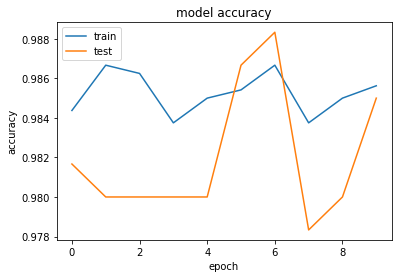

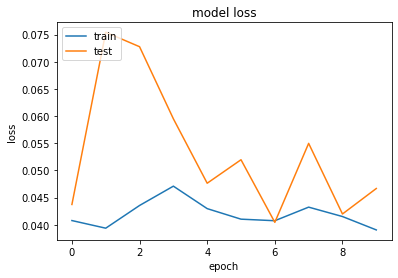

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(type(history))

<class 'keras.callbacks.History'>


In [ ]:
def make_predictions2(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model2.predict(image)
    return preds

def fresh_or_rotten2(image_path):
    print(image_path)
    preds = make_predictions2(image_path)
    if preds <= 0.5:
        print("Fresh!")
    else:
        print("Rotten!")

/content/drive/MyDrive/Datasets/Fresh/Custom/apple1.jpg
(225, 225, 3)
1/1 [==============================] - 1s 812ms/step
Fresh!


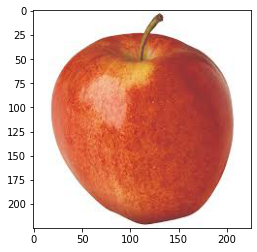

In [ ]:
fresh_or_rotten2('/content/drive/MyDrive/Datasets/Fresh/Custom/apple1.jpg')

/content/drive/MyDrive/Datasets/Fresh/Custom/banana1.jpg
(214, 235, 3)
1/1 [==============================] - 0s 22ms/step
Fresh!


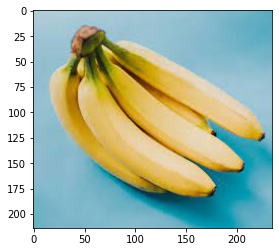

In [ ]:
fresh_or_rotten2('/content/drive/MyDrive/Datasets/Fresh/Custom/banana1.jpg')

/content/drive/MyDrive/Datasets/Fresh/Custom/orange1.jpg
(225, 225, 3)
1/1 [==============================] - 0s 24ms/step
Fresh!


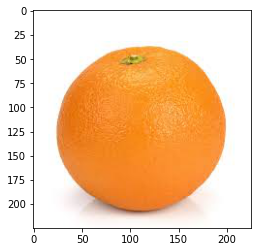

In [ ]:
fresh_or_rotten2('/content/drive/MyDrive/Datasets/Fresh/Custom/orange1.jpg')

/content/drive/MyDrive/Datasets/Fresh/Custom/rotapple2.jpg
(227, 222, 3)
1/1 [==============================] - 0s 80ms/step
Rotten!


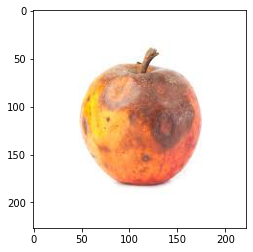

In [ ]:
fresh_or_rotten2('/content/drive/MyDrive/Datasets/Fresh/Custom/rotapple2.jpg')

/content/drive/MyDrive/Datasets/Fresh/Custom/rotbanana2.jpg
(165, 306, 3)
1/1 [==============================] - 0s 33ms/step
Rotten!


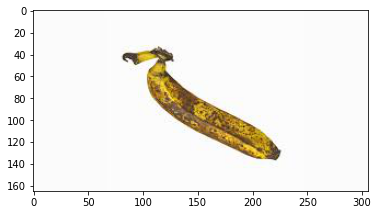

In [ ]:
fresh_or_rotten2('/content/drive/MyDrive/Datasets/Fresh/Custom/rotbanana2.jpg')

/content/drive/MyDrive/Datasets/Fresh/Custom/rotorange1.jpg
(922, 1023, 3)
1/1 [==============================] - 0s 43ms/step
Rotten!


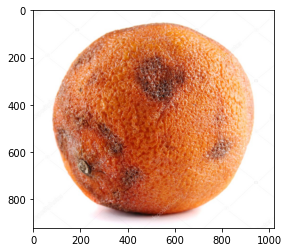

In [ ]:
fresh_or_rotten2('/content/drive/MyDrive/Datasets/Fresh/Custom/rotorange1.jpg')

# Model 3 Inception V3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model


In [ ]:
def inceptionv3_model():
    IMAGE_SIZE = [224, 224]
    inceptionv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', pooling='avg', include_top=False)
    for layer in inceptionv3.layers:
      layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)

    x = Flatten()(inceptionv3.output)
    prediction = Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs=inceptionv3.input, outputs=prediction)
    return model

In [ ]:
model3=inceptionv3_model()

In [ ]:
# compile the model
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history3=model3.fit(train_ds,
          validation_data = valid_ds,
          steps_per_epoch = train_ds.samples/train_ds.batch_size,
          validation_steps = valid_ds.samples/valid_ds.batch_size,
          epochs = 10)

Epoch 1/10
150/150 [==============================] - 97s 615ms/step - loss: 2.4234 - accuracy: 0.6300 - val_loss: 1.6544 - val_accuracy: 0.6400
Epoch 2/10
150/150 [==============================] - 90s 601ms/step - loss: 1.3425 - accuracy: 0.6808 - val_loss: 1.1383 - val_accuracy: 0.6933
Epoch 3/10
150/150 [==============================] - 89s 594ms/step - loss: 1.1925 - accuracy: 0.7060 - val_loss: 0.9750 - val_accuracy: 0.7117
Epoch 4/10
150/150 [==============================] - 88s 590ms/step - loss: 1.0869 - accuracy: 0.7106 - val_loss: 1.1434 - val_accuracy: 0.7117
Epoch 5/10
150/150 [==============================] - 90s 601ms/step - loss: 0.9565 - accuracy: 0.7210 - val_loss: 0.9555 - val_accuracy: 0.7133
Epoch 6/10
150/150 [==============================] - 87s 581ms/step - loss: 0.9544 - accuracy: 0.7296 - val_loss: 1.1652 - val_accuracy: 0.6983
Epoch 7/10
150/150 [==============================] - 89s 594ms/step - loss: 0.9308 - accuracy: 0.7346 - val_loss: 0.8093 - val_ac

In [ ]:
model3.evaluate(valid_ds)

19/19 [==============================] - 5s 238ms/step - loss: 0.8261 - accuracy: 0.7233


[0.8260666131973267, 0.7233333587646484]

In [ ]:
model3.evaluate(test_ds)

38/38 [==============================] - 10s 257ms/step - loss: 0.8268 - accuracy: 0.7194


[0.8268007040023804, 0.7194005250930786]

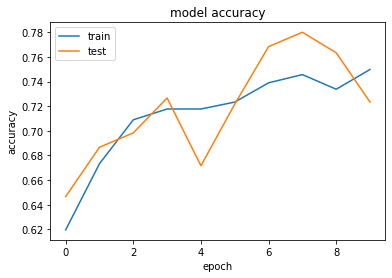

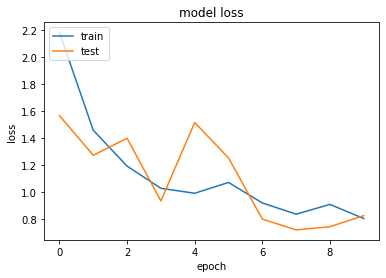

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 4 Resnet

In [ ]:
from tensorflow.keras.applications.resnet import ResNet152

In [ ]:
def resnet152_model():
    IMAGE_SIZE = [224, 224]
    resnet152= ResNet152(input_shape=IMAGE_SIZE + [3], weights='imagenet', pooling='avg', include_top=False)
    for layer in resnet152.layers:
      layer.trainable = False


    x = Flatten()(resnet152.output)
    prediction = Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs=resnet152.input, outputs=prediction)
    return model

In [ ]:
model4=resnet152_model()

234698864/234698864 [==============================] - 7s 0us/step


In [ ]:
# compile the model
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history4=model4.fit(train_ds,
          validation_data = valid_ds,
          steps_per_epoch = train_ds.samples/train_ds.batch_size,
          validation_steps = valid_ds.samples/valid_ds.batch_size,
          epochs = 10)

Epoch 1/10
150/150 [==============================] - 128s 785ms/step - loss: 0.2110 - accuracy: 0.9223 - val_loss: 0.1060 - val_accuracy: 0.9667
Epoch 2/10
150/150 [==============================] - 97s 649ms/step - loss: 0.0890 - accuracy: 0.9723 - val_loss: 0.0736 - val_accuracy: 0.9767
Epoch 3/10
150/150 [==============================] - 98s 651ms/step - loss: 0.0663 - accuracy: 0.9806 - val_loss: 0.0715 - val_accuracy: 0.9783
Epoch 4/10
150/150 [==============================] - 99s 660ms/step - loss: 0.0591 - accuracy: 0.9800 - val_loss: 0.0523 - val_accuracy: 0.9817
Epoch 5/10
150/150 [==============================] - 97s 647ms/step - loss: 0.0500 - accuracy: 0.9852 - val_loss: 0.0508 - val_accuracy: 0.9883
Epoch 6/10
150/150 [==============================] - 102s 677ms/step - loss: 0.0412 - accuracy: 0.9885 - val_loss: 0.0422 - val_accuracy: 0.9833
Epoch 7/10
150/150 [==============================] - 108s 722ms/step - loss: 0.0403 - accuracy: 0.9887 - val_loss: 0.0450 - val

In [ ]:
model4.evaluate(valid_ds)

19/19 [==============================] - 5s 250ms/step - loss: 0.0317 - accuracy: 0.9917


[0.03172432258725166, 0.9916666746139526]

In [ ]:
model4.evaluate(test_ds)

38/38 [==============================] - 11s 273ms/step - loss: 0.0342 - accuracy: 0.9925


[0.03420920670032501, 0.9925062656402588]

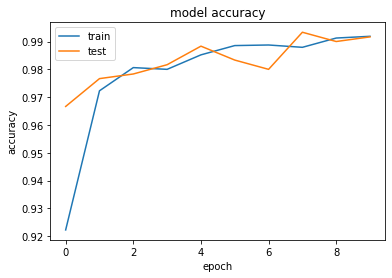

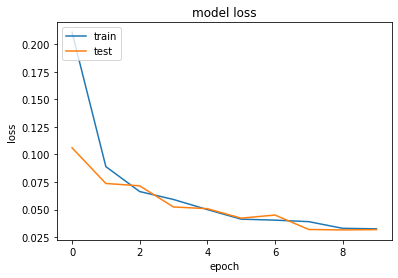

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

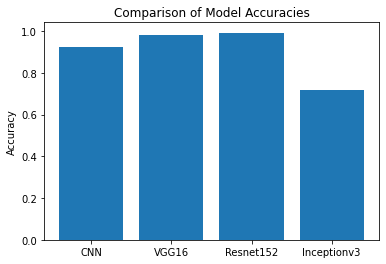

In [ ]:
import matplotlib.pyplot as plt

# list of accuracy scores for 4 models
accuracies = [0.9259, 0.9825,  0.9925, 0.7194]

# create a bar chart to compare the accuracy scores
plt.bar(range(len(accuracies)), accuracies, align='center')

# add labels and title to the chart
plt.xticks(range(len(accuracies)), ['CNN', 'VGG16', 'Resnet152', 'Inceptionv3'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# show the chart
plt.show()


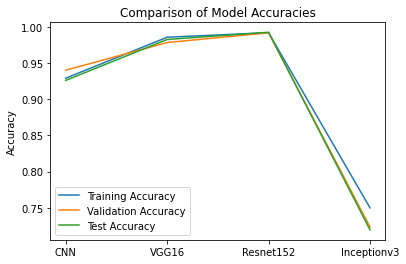

In [ ]:
import matplotlib.pyplot as plt

# list of accuracy scores for 4 models on training, validation, and test sets
train_accuracies = [0.9290, 0.9856, 0.9919, 0.7498]
validation_accuracies = [0.94, 0.9783,  0.9917, 0.7233]
test_accuracies = [0.9259, 0.9825, 0.9925, 0.7194]

# create a line chart to compare the accuracy scores
plt.plot(range(len(train_accuracies)), train_accuracies, label='Training Accuracy')
plt.plot(range(len(validation_accuracies)), validation_accuracies, label='Validation Accuracy')
plt.plot(range(len(test_accuracies)), test_accuracies, label='Test Accuracy')

# add labels and title to the chart
plt.xticks(range(len(train_accuracies)), ['CNN', 'VGG16', 'Resnet152', 'Inceptionv3'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.legend()

# show the chart
plt.show()


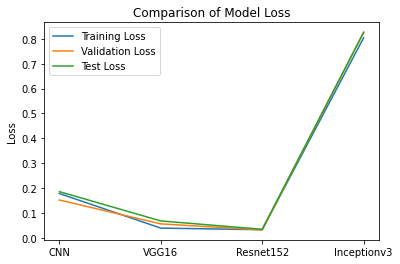

In [ ]:
import matplotlib.pyplot as plt

# list of accuracy scores for 4 models on training, validation, and test sets
train_loss = [0.1782, 0.0390, 0.0325, 0.8046]
validation_loss = [0.1520, 0.0560, 0.0317, 0.8261]
test_loss = [0.1858, 0.0678, 0.0342, 0.8268]

# create a line chart to compare the accuracy scores
plt.plot(range(len(train_loss)), train_loss, label='Training Loss')
plt.plot(range(len(validation_loss)), validation_loss, label='Validation Loss')
plt.plot(range(len(test_loss)), test_loss, label='Test Loss')

# add labels and title to the chart
plt.xticks(range(len(train_loss)), ['CNN', 'VGG16', 'Resnet152', 'Inceptionv3'])
plt.ylabel('Loss')
plt.title('Comparison of Model Loss')
plt.legend()

# show the chart
plt.show()
